# Your name: <Enter your name>
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [5]:
# import packages 
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data File Reading Section
## Write code to read in data from external sources here

In [6]:
#read datasets
data = pd.read_csv('/content/data.csv', encoding = 'ISO-8859-1')

# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [8]:
# 1.statistical description of data
data.describe()

,so2,no2,rspm,spm,pm2_5
count,262164.000000,277959.000000,263823.000000,133308.000000,7866.000000
mean,10.748180,22.675328,93.789038,191.480595,39.336489
std,10.805834,16.079191,62.541380,129.722591,30.479184
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,4.000000,12.000000,53.000000,102.000000,24.000000
50%,7.600000,19.000000,80.000000,168.000000,32.000000
75%,14.000000,29.000000,117.000000,249.000000,43.000000
max,597.000000,696.000000,1082.000000,2213.000000,504.000000


In [9]:
#2. Display number of total rows and columns of the dataset 
data.shape

(290123, 13)

In [10]:
#3. Display number of non-null values for each column
data.count()

stn_code                       194804
sampling_date                  290123
state                          290123
location                       290123
agency                         191557
type                           286427
so2                            262164
no2                            277959
rspm                           263823
spm                            133308
location_monitoring_station    271633
pm2_5                            7866
date                           290118
dtype: int64

In [11]:
#4. Display number of null values for each column
data.isnull().sum()

stn_code                        95319
sampling_date                       0
state                               0
location                            0
agency                          98566
type                             3696
so2                             27959
no2                             12164
rspm                            26300
spm                            156815
location_monitoring_station     18490
pm2_5                          282257
date                                5
dtype: int64

In [12]:
#5. Display range, column, number of non-null objects of each column, datatype and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290123 entries, 0 to 290122
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     194804 non-null  object 
 1   sampling_date                290123 non-null  object 
 2   state                        290123 non-null  object 
 3   location                     290123 non-null  object 
 4   agency                       191557 non-null  object 
 5   type                         286427 non-null  object 
 6   so2                          262164 non-null  float64
 7   no2                          277959 non-null  float64
 8   rspm                         263823 non-null  float64
 9   spm                          133308 non-null  float64
 10  location_monitoring_station  271633 non-null  object 
 11  pm2_5                        7866 non-null    float64
 12  date                         290118 non-null  object 
dtyp

In [13]:
#6. Display Top 10 records
data.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [14]:
# Display bottom 10
data.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
290113,NaN,31-12-07,Puducherry,Pondicherry,NaN,Residential and others,5.0,5.3,54.0,78.0,Chamber of Commerce,NaN,2007-12-31
290114,NaN,2/3/2007,Puducherry,Pondicherry,NaN,Residential and others,2.4,8.3,53.0,83.0,DSTC Office,NaN,2007-03-02
290115,NaN,2/7/2007,Puducherry,Pondicherry,NaN,Residential and others,3.3,15.2,114.0,186.0,DSTC Office,NaN,2007-07-02
290116,NaN,2/10/2007,Puducherry,Pondicherry,NaN,Residential and others,3.7,6.9,50.0,80.0,DSTC Office,NaN,2007-10-02
290117,NaN,14-02-07,Puducherry,Pondicherry,NaN,Residential and others,4.2,9.4,47.0,78.0,DSTC Office,NaN,2007-02-14
290118,NaN,17-02-07,Puducherry,Pondicherry,NaN,Residential and others,4.3,NaN,67.0,121.0,DSTC Office,NaN,2007-02-17
290119,NaN,21-02-07,Puducherry,Pondicherry,NaN,Residential and others,3.3,7.1,38.0,60.0,DSTC Office,NaN,2007-02-21
290120,NaN,24-02-07,Puducherry,Pondicherry,NaN,Residential and others,NaN,NaN,49.0,82.0,DSTC Office,NaN,2007-02-24
290121,NaN,28-02-07,Puducherry,Pondicherry,NaN,Residential and others,NaN,11.2,48.0,66.0,DSTC Office,NaN,2007-02-28
290122,NaN,3/3/2007,Puducherry,Pondicherry,NaN,Residential and others,NaN,5.6,38.0,71.0,DSTC Office,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [15]:
# Cleaning up the data

#dropping columns that aren't required

df = data.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis = 1, inplace=True)

# dropping rows where no date is available

df = data.dropna(subset=['date'])

In [16]:
# displaying final columns (data.columns)

df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [17]:
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }

df.type = data.type.replace(types)


In [18]:
# Display top 10 records after codification of 'types'
df.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [20]:
#extract year from date and create new column
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [21]:
# define columns of importance, which shall be used reguarly (COLS = ....)
COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [22]:
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[COLS] = imputer.fit_transform(df[COLS])

In [23]:
df.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,93.789481,191.481498,39.336489,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,93.789481,191.481498,39.336489,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,93.789481,191.481498,39.336489,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,93.789481,191.481498,39.336489,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,93.789481,191.481498,39.336489,1990-03-01,1990
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,93.789481,191.481498,39.336489,1990-03-01,1990
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,93.789481,191.481498,39.336489,1990-04-01,1990
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,93.789481,191.481498,39.336489,1990-04-01,1990
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,93.789481,191.481498,39.336489,1990-04-01,1990
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,93.789481,191.481498,39.336489,1990-05-01,1990


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290118 entries, 0 to 290121
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     290118 non-null  object 
 1   location  290118 non-null  object 
 2   type      290118 non-null  object 
 3   so2       290118 non-null  float64
 4   no2       290118 non-null  float64
 5   rspm      290118 non-null  float64
 6   spm       290118 non-null  float64
 7   pm2_5     290118 non-null  float64
 8   date      290118 non-null  object 
 9   year      290118 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 24.3+ MB


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [26]:
so2_state = data[['so2','state']].groupby('state', as_index=False).median().sort_values(by='so2')
so2_state.head(10)

,state,so2
12,Himachal Pradesh,2.0
1,Arunachal Pradesh,2.0
22,Nagaland,2.0
21,Mizoram,2.0
4,Chandigarh,2.0
20,Meghalaya,2.0
16,Kerala,3.4
19,Manipur,3.8
23,Odisha,4.0
13,Jammu & Kashmir,5.0


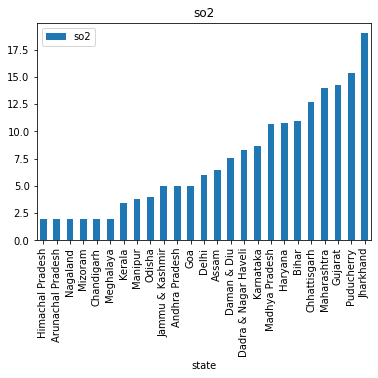

In [34]:
import matplotlib.pyplot as plt
so2_state.plot(kind='bar',x='state',y='so2', title='so2')

### no2 status

In [28]:
no2_state = data[['no2','state']].groupby('state', as_index=False).median().sort_values(by='no2')
no2_state.head(10)

,state,no2
1,Arunachal Pradesh,5.0
21,Mizoram,5.0
22,Nagaland,6.0
20,Meghalaya,10.0
9,Goa,11.0
13,Jammu & Kashmir,12.9
12,Himachal Pradesh,13.0
16,Kerala,13.0
2,Assam,14.0
24,Puducherry,15.0


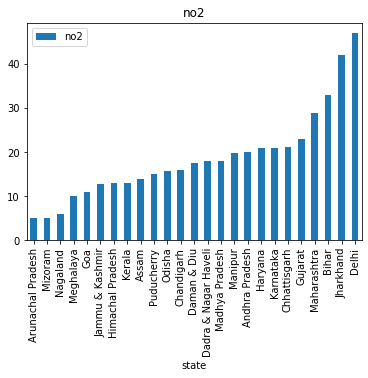

In [33]:
no2_state.plot(kind='bar',x='state',y='no2', title='no2')

### rspm status

In [30]:
rspm_state = data[['rspm','state']].groupby('state', as_index=False).median().sort_values(by='rspm')
rspm_state.head(10)

,state,rspm
21,Mizoram,40.0
16,Kerala,47.0
24,Puducherry,49.0
9,Goa,54.0
20,Meghalaya,56.0
19,Manipur,61.0
15,Karnataka,61.0
0,Andhra Pradesh,74.0
1,Arunachal Pradesh,74.0
2,Assam,76.0


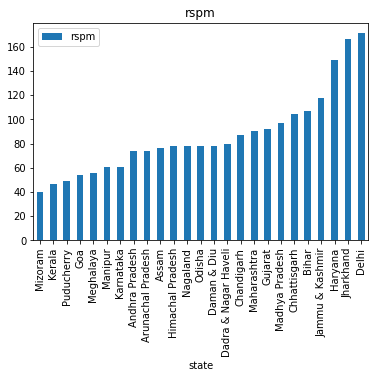

In [32]:
rspm_state.plot(kind='bar', x='state', y='rspm', title='rspm')

### spm status

In [35]:
spm_state = data[['spm','state']].groupby('state', as_index=False).median().sort_values(by='spm')
spm_state.head(10)

,state,spm
9,Goa,34.0
20,Meghalaya,68.5
16,Kerala,72.0
24,Puducherry,82.0
21,Mizoram,83.0
19,Manipur,120.5
2,Assam,123.0
22,Nagaland,133.0
15,Karnataka,138.0
7,Daman & Diu,140.0


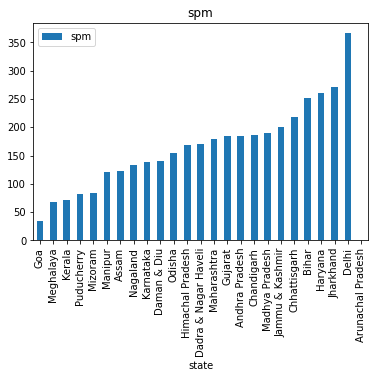

In [36]:
spm_state.plot(kind='bar',x='state',y='spm',title='spm')

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [37]:
df_new = df[df.state == "Andhra Pradesh"] 
df_new.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,93.789481,191.481498,39.336489,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,93.789481,191.481498,39.336489,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,93.789481,191.481498,39.336489,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,93.789481,191.481498,39.336489,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,93.789481,191.481498,39.336489,1990-03-01,1990


In [39]:
# Display yearly trend graph (year vs. value)
AP_new = df_new.groupby(by=["year"]).median()
AP_new.head(5)

,so2,no2,rspm,spm,pm2_5
year,,,,,
1990,5.60,13.6,93.789481,179.000000,39.336489
1991,8.25,12.8,93.789481,141.500000,39.336489
1992,12.40,27.6,93.789481,192.000000,39.336489
1993,6.00,11.4,93.789481,191.481498,39.336489
1994,8.70,14.2,93.789481,191.481498,39.336489


In [40]:
AP_new = AP_new.iloc[:,0:4]
AP_new

,so2,no2,rspm,spm
year,,,,
1990,5.60,13.600000,93.789481,179.000000
1991,8.25,12.800000,93.789481,141.500000
1992,12.40,27.600000,93.789481,192.000000
1993,6.00,11.400000,93.789481,191.481498
1994,8.70,14.200000,93.789481,191.481498
1995,14.10,26.300000,93.789481,147.000000
1996,18.85,30.150000,93.789481,181.500000
1997,16.40,28.400000,93.789481,145.000000
1998,10.15,20.250000,93.789481,152.000000


Text(0.5, 1.0, 'Yearly trend graph of so2 and no2')

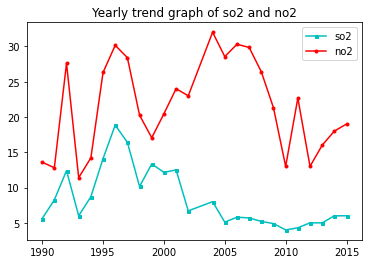

In [41]:
#Display graph of so2 and no2
plt.plot(AP_new['so2'], '-sc',label='so2',markersize = 3)
plt.plot(AP_new['no2'], '-or',label='no2', markersize = 3)
plt.legend()
plt.title('Yearly trend graph of so2 and no2')

Text(0.5, 1.0, 'Yearly trend graph of rspm and spm')

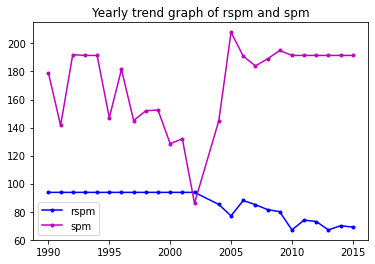

In [44]:
plt.plot(AP_new['rspm'], '-ob',label='rspm',markersize = 3)
plt.plot(AP_new['spm'], '-om',label='spm', markersize = 3)
plt.legend()
plt.title('Yearly trend graph of rspm and spm')

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



In [ ]:
#One thing we can conclude from analysing the graphs, is that so2 and no2 are very irregular but on average stays the same over the years.
#However, on the rspm and spm graph, rspm is decreasing over the years which is pretty alarming.